In [6]:
import nltk
from nltk import word_tokenize

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samsonbobo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords

In [9]:
stops = set(stopwords.words('english'))
print(stops)

{'s', 'out', "shouldn't", 'yours', "that'll", 'ours', 'yourselves', 'our', "i'll", 'the', 'don', 'her', 'shan', 'shouldn', 'very', 'while', 'as', 'been', 'for', 'are', 'yourself', 're', 'why', 'same', 'y', 'itself', 'wouldn', 'off', "couldn't", 'nor', 'won', 'further', 'most', 'does', 'them', 'just', 'those', 'because', 'his', 'own', "we're", 'some', "she'd", 'i', "we'd", 'can', 'these', "wasn't", "you'd", 'wasn', "she's", 'being', "haven't", 'through', 'do', 'each', 'more', 'down', "he'd", 'there', 'between', 'is', 'your', 'doesn', 'have', "weren't", 'a', 'which', 'such', "we've", 'mightn', 'its', "we'll", 'o', "doesn't", 'haven', 'and', "hadn't", "you're", 'we', 'few', 'from', 'has', 'theirs', "shan't", "they'll", 'weren', "she'll", 'when', 'should', 'now', 've', "mustn't", "it'll", 'doing', "don't", 'it', 'by', 'hasn', "they've", 't', 'where', 'their', 'too', "should've", "you'll", 'what', 'm', 'than', 'during', 'up', 'him', 'you', 'until', 'below', 'then', 'an', 'into', "i'd", "has

In [10]:
corpus = "A person flew to mars yesterday. He carried biryani masala with him."

In [11]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [12]:
doc = nlp(corpus)

for token in doc:
    print(token, "|", token.pos_, "|", spacy.explain(token.pos_), "|", token.tag_, "|", spacy.explain(token.tag_), "|", token.is_stop)

A | DET | determiner | DT | determiner | True
person | NOUN | noun | NN | noun, singular or mass | False
flew | VERB | verb | VBD | verb, past tense | False
to | ADP | adposition | IN | conjunction, subordinating or preposition | True
mars | NOUN | noun | NNS | noun, plural | False
yesterday | NOUN | noun | NN | noun, singular or mass | False
. | PUNCT | punctuation | . | punctuation mark, sentence closer | False
He | PRON | pronoun | PRP | pronoun, personal | True
carried | VERB | verb | VBD | verb, past tense | False
biryani | ADJ | adjective | JJ | adjective (English), other noun-modifier (Chinese) | False
masala | NOUN | noun | NN | noun, singular or mass | False
with | ADP | adposition | IN | conjunction, subordinating or preposition | True
him | PRON | pronoun | PRP | pronoun, personal | True
. | PUNCT | punctuation | . | punctuation mark, sentence closer | False


In [13]:
corpus = ['data science is one of the most important fields of science',
          'this is one of the best data science courses',
          'data scientists analyze data' ]

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tr_idf_model = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(corpus)

In [16]:
print(type(tf_idf_vector), tf_idf_vector.shape)

<class 'scipy.sparse._csr.csr_matrix'> (3, 14)


In [17]:
tf_idf_array = tf_idf_vector.toarray()
print(tf_idf_array)

[[0.         0.         0.         0.18952581 0.32089509 0.32089509
  0.24404899 0.32089509 0.48809797 0.24404899 0.48809797 0.
  0.24404899 0.        ]
 [0.         0.40029393 0.40029393 0.23642005 0.         0.
  0.30443385 0.         0.30443385 0.30443385 0.30443385 0.
  0.30443385 0.40029393]
 [0.54270061 0.         0.         0.64105545 0.         0.
  0.         0.         0.         0.         0.         0.54270061
  0.         0.        ]]


In [18]:
words_set = tr_idf_model.get_feature_names_out()
print(words_set)

['analyze' 'best' 'courses' 'data' 'fields' 'important' 'is' 'most' 'of'
 'one' 'science' 'scientists' 'the' 'this']


In [19]:
import pandas as pd

In [20]:
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)
df_tf_idf

,analyze,best,courses,data,fields,important,is,most,of,one,science,scientists,the,this
0,0.000000,0.000000,0.000000,0.189526,0.320895,0.320895,0.244049,0.320895,0.488098,0.244049,0.488098,0.000000,0.244049,0.000000
1,0.000000,0.400294,0.400294,0.236420,0.000000,0.000000,0.304434,0.000000,0.304434,0.304434,0.304434,0.000000,0.304434,0.400294
2,0.542701,0.000000,0.000000,0.641055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.542701,0.000000,0.000000


### 3. GET DATASET

In [21]:
train_df = pd.read_csv("train.csv")
display(train_df.head(5))
print(train_df.info())

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81408 entries, 0 to 81407
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  81408 non-null  object
 1   class   81408 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None


In [22]:
test_df = pd.read_csv("test.csv")
display(test_df.head(5))
print(test_df.info())

,tweets,class
0,no one ever predicted this was going to happen...,figurative
1,@Stooshie its as closely related as Andrews or...,figurative
2,I find it ironic when Vegans say they love foo...,figurative
3,Quick rt that throwing money vine I've not see...,figurative
4,"yep, keep adding me to your #devops lists.... ...",figurative


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  8126 non-null   object
 1   class   8119 non-null   object
dtypes: object(2)
memory usage: 127.1+ KB
None


In [23]:
train_df["class"].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

In [24]:
test_df["class"].unique()

array(['figurative', nan, 'irony', 'regular', 'sarcasm'], dtype=object)

In [25]:
test_df.dropna(inplace=True)

In [26]:
combined_df = pd.concat([train_df, test_df], axis=0)
combined_df["class"].unique()

array(['figurative', 'irony', 'regular', 'sarcasm'], dtype=object)

In [27]:
label_map = {
    "figurative":0,
    "sarcasm":1,
    "irony":2,
    "regular":3
}

In [28]:
train_df['label'] = train_df['class'].map(label_map)
train_df.head(5)

,tweets,class,label
0,Be aware dirty step to get money #staylight ...,figurative,0
1,#sarcasm for #people who don't understand #diy...,figurative,0
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative,0
3,@wilw Why do I get the feeling you like games?...,figurative,0
4,-@TeacherArthurG @rweingarten You probably jus...,figurative,0


In [29]:
import re

### 5.Data cleaning and TF-IDF embedding

In [30]:
print(train_df["tweets"][0])
out = re.sub("[^a-zA-Z0-9]"," ", train_df["tweets"][0])
print(out)
out = re.sub(" +"," ", out)
print(out)

Be aware  dirty step to get money  #staylight #staywhite  #sarcastic #moralneeded @… https://t.co/Oj6BdyX3WG
Be aware  dirty step to get money   staylight  staywhite   sarcastic  moralneeded    https   t co Oj6BdyX3WG
Be aware dirty step to get money staylight staywhite sarcastic moralneeded https t co Oj6BdyX3WG


In [31]:

doc = nlp(train_df["tweets"][0])
text = []
for token in doc:
    if not (token.is_stop or token.is_punct or token.like_url or token.is_space):
        text.append(token.lemma_)
print(text)
" ".join(text)


['aware', 'dirty', 'step', 'money', 'staylight', 'staywhite', 'sarcastic', 'moralneede']


'aware dirty step money staylight staywhite sarcastic moralneede'

In [32]:
class Vectorizer():
    def __init__(self, clean_pattern=None, max_features=None, stop_words=None):
        self.clean_pattern = clean_pattern
        self.max_features = max_features
        self.stopwords = stop_words
        self.tfidf = TfidfVectorizer(stop_words=self.stopwords, max_features=self.max_features)
        self.builded = False


    def _clean_texts(self, texts):

        cleaned = []
        for text in texts:
            

            #Spacy block start
            doc = nlp(text)
            text = []
            for token in doc:
                 if not (token.is_stop or token.is_punct or token.like_url or token.is_space):
                     text.append(token.lemma_)
            text = " ".join(text)
                     #Spacy block end

            cleaned.append(text)

        return cleaned


    def _set_tfidf(self, cleaned_texts):
        self.tfidf.fit(cleaned_texts)

    def build_vectorizer(self, texts):
        cleaned_texts = self._clean_texts(texts)
        self._set_tfidf(cleaned_texts)
        self.builded = True

    def vectorizeTexts(self, texts):
        if self.builded:
            cleaned_texts = self._clean_texts(texts)
            return self.tfidf.transform(cleaned_texts)

        else:
            raise Exception("Vectorizer is not builded.")

In [33]:
from torch.utils.data import Dataset

In [34]:
class TweetDataset(Dataset):

    def __init__(self, x_vectorized, y_encoded):
        self.x_vectorized = x_vectorized
        self.y_encoded = y_encoded


    def __len__(self):
        return len(self.x_vectorized)


    def __getitem__(self, index):
        return self.x_vectorized[index],self.y_encoded[index]

In [35]:
vectorizer = Vectorizer("[^a-zA-Z0-9]", max_features=7000, stop_words="english")


In [36]:
X = list(train_df['tweets'])

In [37]:
vectorizer.build_vectorizer(list(combined_df['tweets']))


In [38]:
vectorized_X = vectorizer.vectorizeTexts(X).toarray()
vectorized_X.shape


(81408, 7000)

In [39]:
y = train_df['label'].to_numpy()

In [40]:
dataset = TweetDataset(vectorized_X, y)
print(f"Length of dataset: {len(dataset)}")

Length of dataset: 81408


In [41]:
from sklearn.model_selection import train_test_split



In [42]:
train_dataset, validation_dataset = train_test_split(list(range(0,len(dataset))), test_size=0.25,
                                                      random_state=2024, stratify=dataset.y_encoded)


In [43]:
print("Train dataset length:", len(train_dataset))
print("Test dataset length:", len(validation_dataset))

Train dataset length: 61056
Test dataset length: 20352


In [44]:
from torch.utils.data.sampler import SubsetRandomSampler

In [45]:
train_sampler = SubsetRandomSampler(train_dataset)
validation_sampler = SubsetRandomSampler(validation_dataset)

4. ### Dataloader

In [46]:
from torch.utils.data import DataLoader

In [47]:
BATCH_SIZE = 128

train_loader = DataLoader(dataset, batch_size=BATCH_SIZE,
                          sampler=train_sampler)
validation_loader = DataLoader(dataset, batch_size=BATCH_SIZE,
                               sampler=validation_sampler)

In [48]:
import torch

In [49]:
class DenseNetwork(torch.nn.Module):

    def __init__(self, input_shape: int, output_shape: int):
        super(DenseNetwork,self).__init__()
        self.block1 = torch.nn.Sequential(
            torch.nn.Linear(input_shape, 1024),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.4)
        )
        self.block2 = torch.nn.Sequential(
            torch.nn.Linear(1024, 256),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.4)
        )
        self.classifier = torch.nn.Linear(256, output_shape)

    def forward(self, x: torch.Tensor):
        x = self.block1(x.to(torch.float))
        x = self.block2(x)
        x = self.classifier(x)

        return x

In [50]:
import torch

from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    """Trains a PyTorch model for a single epoch.

    Turns a target PyTorch model to training mode and then
    runs through all of the required training steps (forward
    pass, loss calculation, optimizer step).

    Args:
    model: A PyTorch model to be trained.
    dataloader: A DataLoader instance for the model to be trained on.
    loss_fn: A PyTorch loss function to minimize.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of training loss and training accuracy metrics.
    In the form (train_loss, train_accuracy). For example:

    (0.1112, 0.8743)
    """
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    """Tests a PyTorch model for a single epoch.

    Turns a target PyTorch model to "eval" mode and then performs
    a forward pass on a testing dataset.

    Args:
    model: A PyTorch model to be tested.
    dataloader: A DataLoader instance for the model to be tested on.
    loss_fn: A PyTorch loss function to calculate loss on the test data.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A tuple of testing loss and testing accuracy metrics.
    In the form (test_loss, test_accuracy). For example:

    (0.0223, 0.8985)
    """
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          scheduler: torch.optim.lr_scheduler,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]}
    For example if training for epochs=2:
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]}
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    total_accu = None

    # Make sure model on target device
    model.to(device)

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device)
        test_loss, test_acc = test_step(model=model,
          dataloader=test_dataloader,
          loss_fn=loss_fn,
          device=device)

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        if total_accu is not None and total_accu > test_acc:
            scheduler.step()
        else:
            total_accu = test_acc

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # Return the filled results at the end of the epochs
    return results

In [51]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = DenseNetwork(7000, 4).to(device=device)

In [56]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

In [ ]:
# Set the random seeds
torch.manual_seed(2024)


# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = train(model=model,
                train_dataloader=train_loader,
                test_dataloader=validation_loader,
                optimizer=optimizer,
                loss_fn=loss_fn,
                scheduler=scheduler,
                epochs=5,
                device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4652 | train_acc: 0.7449 | test_loss: 0.5141 | test_acc: 0.7350
Epoch: 2 | train_loss: 0.4570 | train_acc: 0.7461 | test_loss: 0.5145 | test_acc: 0.7351
Epoch: 3 | train_loss: 0.4778 | train_acc: 0.7429 | test_loss: 0.5144 | test_acc: 0.7349
Epoch: 4 | train_loss: 0.4775 | train_acc: 0.7429 | test_loss: 0.5143 | test_acc: 0.7349
Epoch: 5 | train_loss: 0.4776 | train_acc: 0.7429 | test_loss: 0.5143 | test_acc: 0.7349
[INFO] Total training time: 280.255 seconds


In [59]:
from matplotlib import pyplot as plt

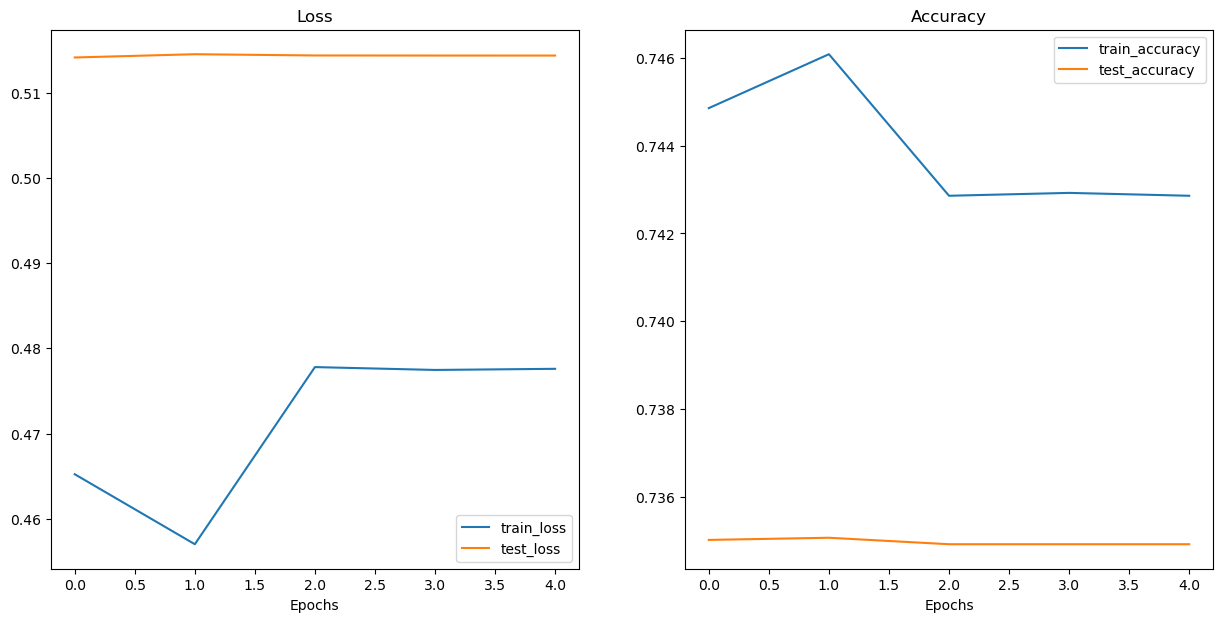

In [60]:
loss = results["train_loss"]
test_loss = results["test_loss"]

accuracy = results["train_acc"]
test_accuracy = results["test_acc"]

epochs = range(len(results["train_loss"]))

plt.figure(figsize=(15, 7))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label="train_loss")
plt.plot(epochs, test_loss, label="test_loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, label="train_accuracy")
plt.plot(epochs, test_accuracy, label="test_accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.legend()

1. ### Create Test Data loader and test embeddings

In [65]:
BATCH_SIZE = 128

test_dataloader = DataLoader(dataset, batch_size=BATCH_SIZE,
                          sampler=None)



In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, test_loader, criterion, device, class_names):
    """
    Evaluates the DenseNet model on the test dataset and plots confusion matrix.
    
    Parameters:
        model: Trained DenseNet model
        test_loader: DataLoader for test dataset
        criterion: Loss function (e.g., CrossEntropyLoss)
        device: "cuda" if GPU is available, else "cpu"
        class_names: List of class names for confusion matrix
    
    Returns:
        avg_loss: Average loss on the test set
        avg_accuracy: Accuracy on the test set
    """
    model.eval()  # Set to evaluation mode
    total_loss = 0.0
    all_preds = []
    all_labels = []

    with torch.no_grad():  # No gradients needed during evaluation
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move to GPU/CPU
            
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            total_loss += loss.item()

            # Convert outputs to class predictions
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute average loss & accuracy
    avg_loss = total_loss / len(test_loader)
    avg_accuracy = accuracy_score(all_labels, all_preds) * 100
    
    print(f"Test Loss: {avg_loss:.4f} | Test Accuracy: {avg_accuracy:.2f}%")
    print("\nClassification Report:\n", classification_report(all_labels, all_preds))

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    return avg_loss, avg_accuracy


Test Loss: 0.4851 | Test Accuracy: 74.08%

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.01      0.03     21238
           1       0.66      1.00      0.80     20681
           2       0.66      1.00      0.80     20894
           3       1.00      1.00      1.00     18595

    accuracy                           0.74     81408
   macro avg       0.77      0.75      0.65     81408
weighted avg       0.76      0.74      0.64     81408



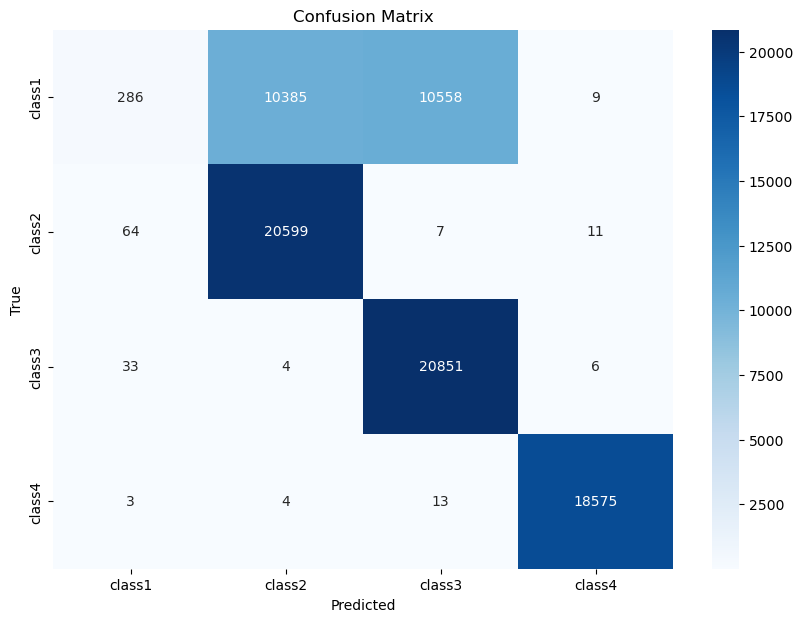

In [75]:
# Define loss function (assuming classification task)
criterion = nn.CrossEntropyLoss()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Assuming class_names are defined as a list of your class labels
class_names = ['class1', 'class2', 'class3', 'class4']  # Update with your actual class names

# Run evaluation
test_loss, test_accuracy = evaluate_model(model, test_dataloader, criterion, device, class_names)


In [76]:
import os

# Ensure the directory exists
save_dir = 'models'
os.makedirs(save_dir, exist_ok=True)

# Define the filename with directory
model_filename = os.path.join(save_dir, 'model_tweet_pred.pth')  # Save in 'models' folder

# Save the model
torch.save(model.state_dict(), model_filename)
